In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import key
from citipy import citipy

In [2]:
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    x = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if x not in cities:
        cities.append(x)

len(cities)

611

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={key}&units={units}&q="

city_name = []
data = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        data.append(response)
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count = count + 1
        print(f"Data gathered for city {count}: {city}.")
    except:
        print(f"Data not found for {city}. Trying next city....")

Data gathered for city 1: rikitea.
Data gathered for city 2: tuktoyaktuk.
Data gathered for city 3: bud.
Data gathered for city 4: souillac.
Data gathered for city 5: hyeres.
Data gathered for city 6: cabo san lucas.
Data gathered for city 7: barrow.
Data gathered for city 8: ust-nera.
Data gathered for city 9: waipawa.
Data gathered for city 10: buraydah.
Data gathered for city 11: hirado.
Data gathered for city 12: shiyan.
Data gathered for city 13: dingle.
Data gathered for city 14: rawson.
Data gathered for city 15: nakamura.
Data not found for grand river south east. Trying next city....
Data gathered for city 16: santo antonio do sudoeste.
Data gathered for city 17: beringovskiy.
Data gathered for city 18: albany.
Data gathered for city 19: port lincoln.
Data gathered for city 20: bambous virieux.
Data gathered for city 21: ponta do sol.
Data gathered for city 22: port elizabeth.
Data gathered for city 23: kariapatti.
Data not found for toliary. Trying next city....
Data gathered

Data gathered for city 192: quelimane.
Data gathered for city 193: san quintin.
Data gathered for city 194: alekseyevsk.
Data gathered for city 195: cabedelo.
Data gathered for city 196: katherine.
Data gathered for city 197: alice springs.
Data not found for bardiyah. Trying next city....
Data gathered for city 198: shirokiy.
Data gathered for city 199: huarmey.
Data not found for vaitupu. Trying next city....
Data gathered for city 200: tomigusuku.
Data gathered for city 201: solenzo.
Data gathered for city 202: necochea.
Data gathered for city 203: broome.
Data gathered for city 204: thinadhoo.
Data gathered for city 205: victoria.
Data gathered for city 206: pisco.
Data gathered for city 207: roma.
Data not found for olafsvik. Trying next city....
Data gathered for city 208: santa maria.
Data gathered for city 209: kirksville.
Data gathered for city 210: wattegama.
Data not found for mocambique. Trying next city....
Data gathered for city 211: mayo.
Data not found for safaga. Tryin

Data gathered for city 382: kathu.
Data gathered for city 383: bakel.
Data gathered for city 384: bulgan.
Data gathered for city 385: wamba.
Data not found for shirvan. Trying next city....
Data gathered for city 386: destin.
Data gathered for city 387: cherskiy.
Data gathered for city 388: kahului.
Data gathered for city 389: bajil.
Data gathered for city 390: ixtapa.
Data gathered for city 391: angoche.
Data gathered for city 392: hilton head island.
Data gathered for city 393: indian head.
Data not found for canitas. Trying next city....
Data not found for waw. Trying next city....
Data gathered for city 394: kalvarija.
Data gathered for city 395: tripoli.
Data gathered for city 396: bandarbeyla.
Data gathered for city 397: bereda.
Data gathered for city 398: yangjiang.
Data not found for tumannyy. Trying next city....
Data gathered for city 399: kasongo-lunda.
Data gathered for city 400: arlit.
Data gathered for city 401: hambantota.
Data gathered for city 402: kayerkan.
Data not f

In [4]:
weather_labels = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
df = pd.DataFrame(weather_labels)
df.Date = df.Date.astype('datetime64[s]')
df.Date = df.Date.dt.strftime("%m/%d/%Y")
df.to_csv("output_data.csv")
df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Latitude      553
Longitude     553
Max Temp      553
Wind Speed    553
dtype: int64

In [5]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,20,PF,03/04/2019,96,-23.12,-134.97,81.71,14.00
1,Tuktoyaktuk,20,CA,03/04/2019,85,69.44,-133.03,12.20,11.41
2,Bud,0,NO,03/04/2019,100,62.91,6.91,34.00,18.34
3,Souillac,0,FR,03/04/2019,87,45.60,-0.60,48.99,8.05
4,Hyeres,0,FR,03/04/2019,72,43.12,6.14,57.99,8.05


## Observations on Latitude and Max Temp

Out of all the variables, the relationship between latitude and max temp show the most dramatic relationship. We can see that in the Northern hemisphere that max temp has a strong downward trend for cities located further to the North. On the other hand, while a similar (but of course opposite directionally) trend can be seen in the Southern hemisphere, the difference is much smaller between cities of different latitudes. Most likely this is explained by the fact that it is currently winter in the Northern hemisphere and summer in the Southern, so the Southern hemisphere is experiencing warmer and more temperate weather.

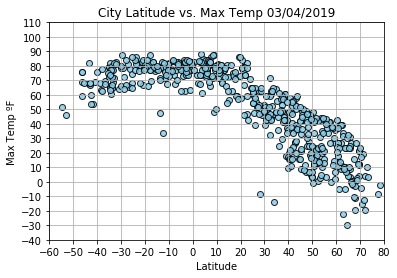

In [6]:
lat_temp_plot = plt.scatter(df['Latitude'], df['Max Temp'], facecolors='skyblue', edgecolors='black', alpha=.85)
plt.title(f"City Latitude vs. Max Temp {df.Date[0]}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp ºF')
plt.xlim(-60, 80)
plt.ylim(-40, 110)
plt.xticks(range(-60, 90, 10))
plt.yticks(range(-40, 120, 10))
plt.grid()
plt.savefig("lat_temp_plot.png")

## Observations on Latitude and Humidity

Unlike the previous plot, the relationship between latitude and humidity does not seem to have much of a recognizable pattern. Humidity levels seem to vary widely among all latitude values with the only exception being for cities centered near the equator, as there are very few cities that have humidity values of less than 50%, showing that the equator is a generally humid environment.

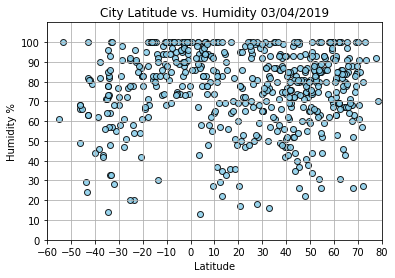

In [7]:
lat_humid_plot = plt.scatter(df['Latitude'], df['Humidity'], facecolors='skyblue', edgecolors='black', alpha=.85)
plt.title(f"City Latitude vs. Humidity {df.Date[0]}")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.xlim(-60, 80)
plt.ylim(0, 110)
plt.xticks(range(-60, 90, 10))
plt.yticks(range(0, 110, 10))
plt.grid()
plt.savefig("lat_humid_plot.png")

## Observations on Latitude and Cloudiness

There seems to be no discernable relationship between latitude and cloudiness of a city, as shown by the plot below.

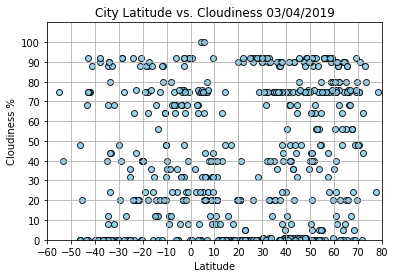

In [8]:
lat_cloud_plot = plt.scatter(df['Latitude'], df['Cloudiness'], facecolors='skyblue', edgecolors='black', alpha=.85)
plt.title(f"City Latitude vs. Cloudiness {df.Date[0]}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.xlim(-60, 80)
plt.ylim(0, 110)
plt.xticks(range(-60, 90, 10))
plt.yticks(range(0, 110, 10))
plt.grid()
plt.savefig("lat_cloud_plot.png")

## Obervations on Latitude and Wind Speed

More of a trend can be seen in the plot below on latitude and wind speed. Cities further from the equator seem to have a larger prevalence of high wind speeds while only a few cities near the equator (-20 to 20) have wind speeds greater than 15mph.

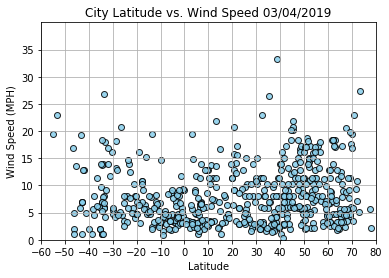

In [9]:
lat_wind_plot = plt.scatter(df['Latitude'], df['Wind Speed'], facecolors='skyblue', edgecolors='black', alpha=.85)
plt.title(f"City Latitude vs. Wind Speed {df.Date[0]}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.xlim(-60, 80)
plt.ylim(0, 40)
plt.xticks(range(-60, 90, 10))
plt.yticks(range(0, 40, 5))
plt.grid()
plt.savefig("lat_wind_plot.png")